# ***1. Problem Definition***


In [25]:
#It is a Regression Problem where the goal is to predict some possible future Bitcoin prices.
#Keep in mind that towards the end i will give the idea that this problem can then be transformed into a classification problem(Invest or not invest)...

# ***2. Data Collection***

In [26]:
###PIP INSTALLS###
!pip install yfinance
!pip install ta
!pip install matplotlib
!pip install pandas
!pip install arch

###ΚΑΤΕΒΑΣΜΑ ΑΠΑΡΑΙΤΗΤΩΝ###
import yfinance as yf
import pandas as pd
import ta
import matplotlib.pyplot as plt



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price         Adj Close        Close         High          Low         Open  \
Ticker          BTC-USD      BTC-USD      BTC-USD      BTC-USD      BTC-USD   
Date                                                                          
2017-05-01  1421.599976  1421.599976  1434.319946  1348.300049  1348.300049   
2017-05-02  1452.819946  1452.819946  1473.900024  1415.689941  1421.030029   
2017-05-03  1490.089966  1490.089966  1492.770020  1447.489990  1453.780029   
2017-05-04  1537.670044  1537.670044  1608.910034  1490.719971  1490.719971   
2017-05-05  1555.449951  1555.449951  1618.030029  1530.310059  1540.869995   

Price          Volume  
Ticker        BTC-USD  
Date                   
2017-05-01  713624000  
2017-05-02  477337984  
2017-05-03  583795968  
2017-05-04  933548992  
2017-05-05  946035968  


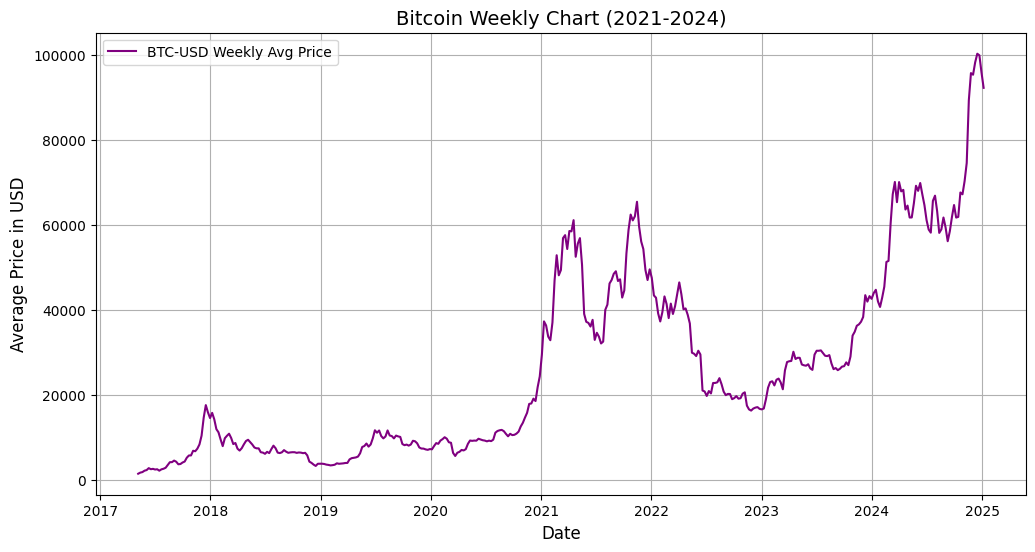

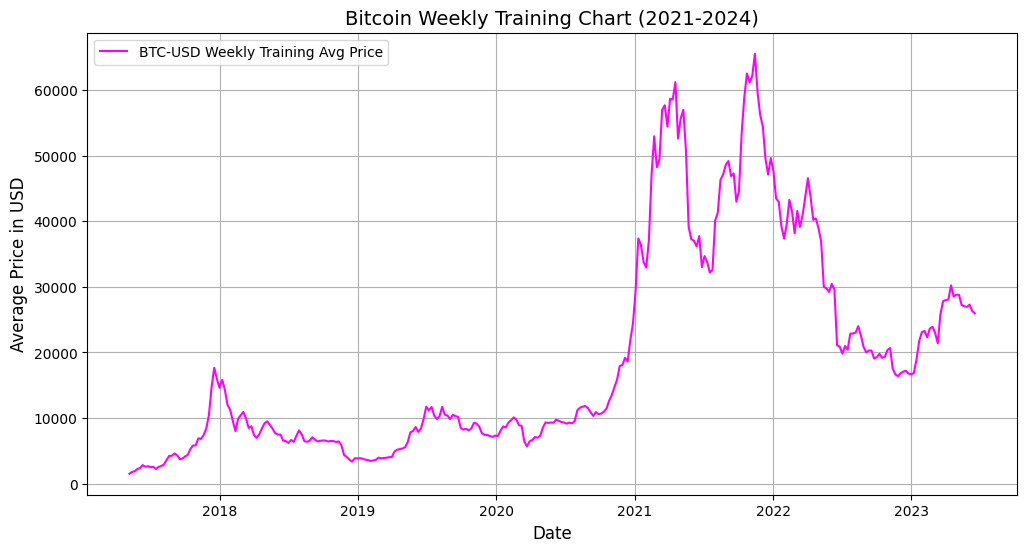

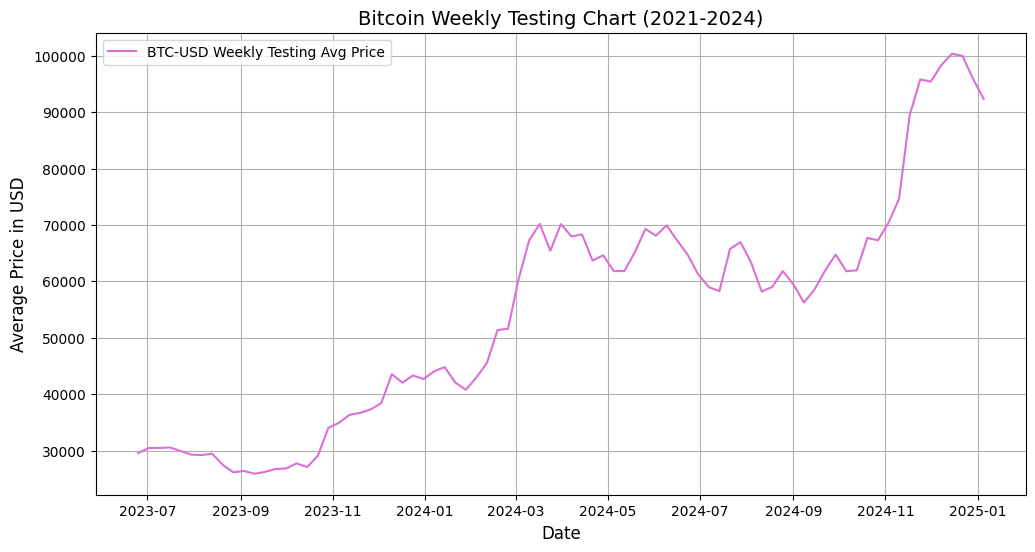

In [27]:
# Κατέβασμα δεδομένων Bitcoin από το Yahoo Finance
btc_data = yf.download("BTC-USD", start="2017-05-01", end="2024-12-31")
btc_data_train = yf.download("BTC-USD", start="2017-05-01", end="2023-06-19")
btc_data_test = yf.download("BTC-USD", start="2023-06-19", end="2024-12-31")

# Εμφάνιση των πρώτων γραμμών
print(btc_data.head())

# Αποθήκευση σε αρχείο CSV (αν χρειάζεται)
#btc_data.to_csv("bitcoin_data.csv")

# Μετατροπή των δεδομένων σε εβδομαδιαία βάση
btc_weekly = btc_data['Close'].resample('W').mean()
btc_weekly_train = btc_data_train['Close'].resample('W').mean()
btc_weekly_test = btc_data_test['Close'].resample('W').mean()

# Εμφάνιση του εβδομαδιαίου διαγράμματος
plt.figure(figsize=(12, 6))
plt.plot(btc_weekly.index, btc_weekly, label='BTC-USD Weekly Avg Price', color='purple')

plt.title('Bitcoin Weekly Chart (2021-2024)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Price in USD', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()


# Εμφάνιση του train διαγράμματος
plt.figure(figsize=(12, 6))
plt.plot(btc_weekly_train.index, btc_weekly_train, label='BTC-USD Weekly Training Avg Price', color='Magenta')

plt.title('Bitcoin Weekly Training Chart (2021-2024)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Price in USD', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()


# Εμφάνιση του test διαγράμματος
plt.figure(figsize=(12, 6))
plt.plot(btc_weekly_test.index, btc_weekly_test, label='BTC-USD Weekly Testing Avg Price', color='Orchid')

plt.title('Bitcoin Weekly Testing Chart (2021-2024)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Price in USD', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

# ***3. Data Exploration and Analysis***

***TIME SERIES ANALYSIS***

***Trend:***

<Figure size 1000x800 with 0 Axes>

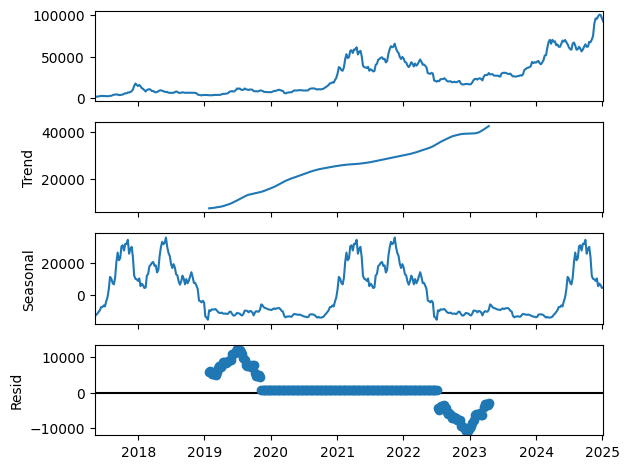

Clear depiction of HTF Trend:


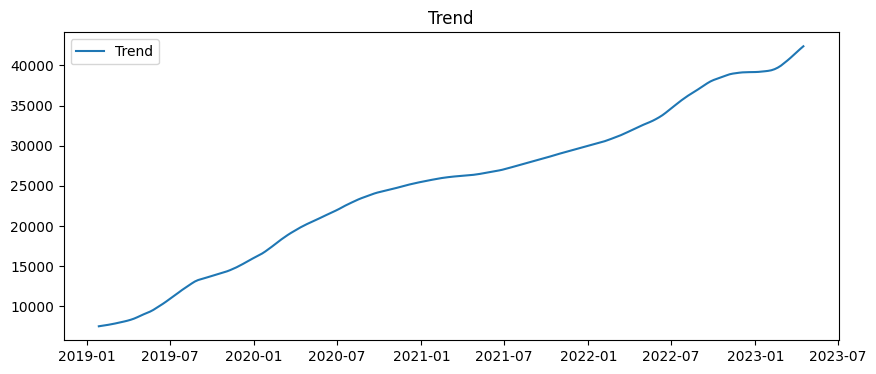

In [28]:
import pandas as pd
import yfinance as yf
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt



##FOR TREND
# Decompose the time series (additive or multiplicative)
result = seasonal_decompose(btc_weekly, model='additive', period=180)  # Weekly data with high timeframe period to identify the trend

# Plot the decomposition
plt.figure(figsize=(10, 8))
result.plot()
plt.show()
print(f'Clear depiction of HTF Trend:')

#plot trend
plt.figure(figsize=(10, 4))
plt.plot(result.trend, label='Trend')
plt.title('Trend')
plt.legend()
plt.show()


Seasonality (Annual)

<Figure size 1000x800 with 0 Axes>

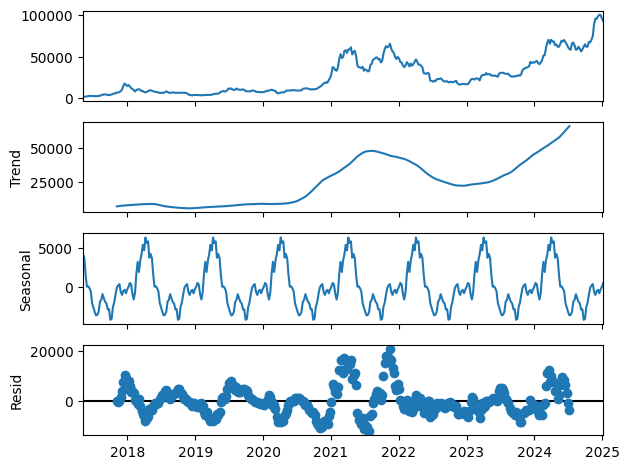

Annual seasonality:


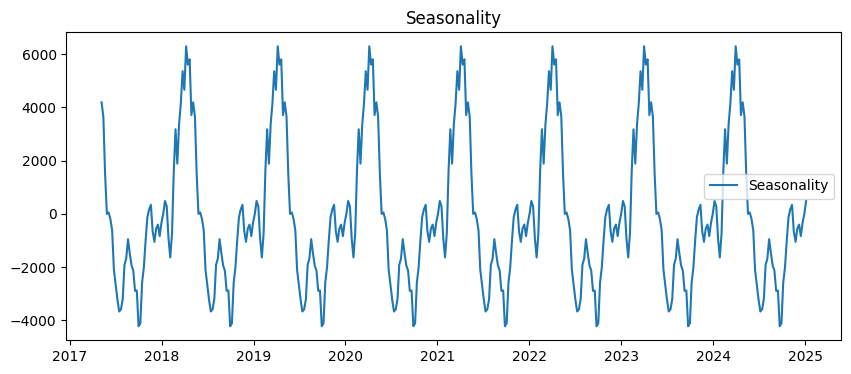

In [29]:
# Decompose the time series (additive or multiplicative)
result = seasonal_decompose(btc_weekly, model='additive', period=52)  # Weekly data with ~1 year seasonality

# Plot the decomposition
plt.figure(figsize=(10, 8))
result.plot()
plt.show()

print(f'Annual seasonality:')

plt.figure(figsize=(10, 4))
plt.plot(result.seasonal, label='Seasonality')
plt.title('Seasonality')
plt.legend()
plt.show()


Residuals

Annual seasonality:


<Figure size 1000x800 with 0 Axes>

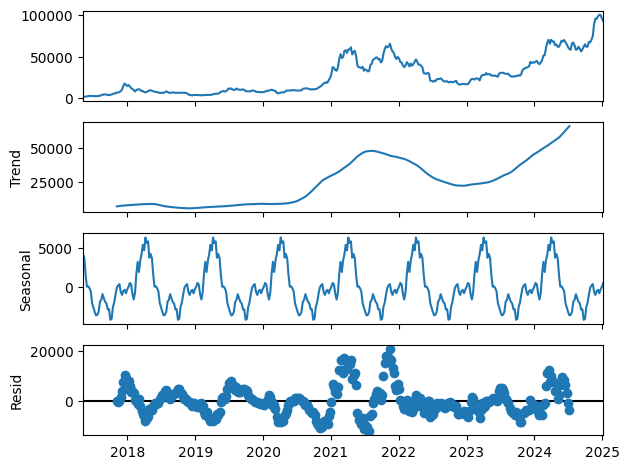

Annual Residuals:


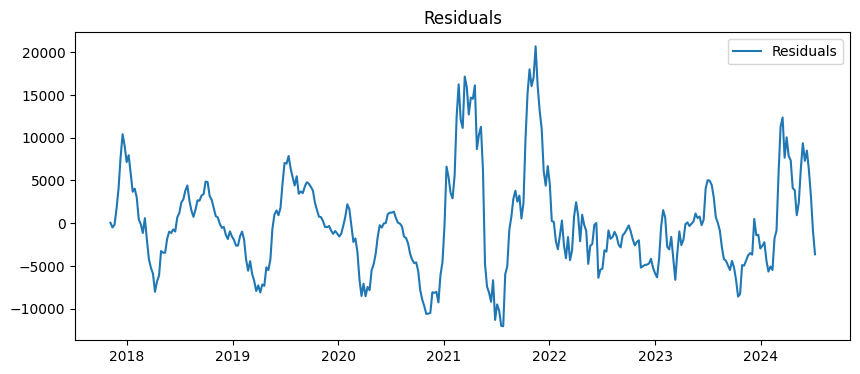

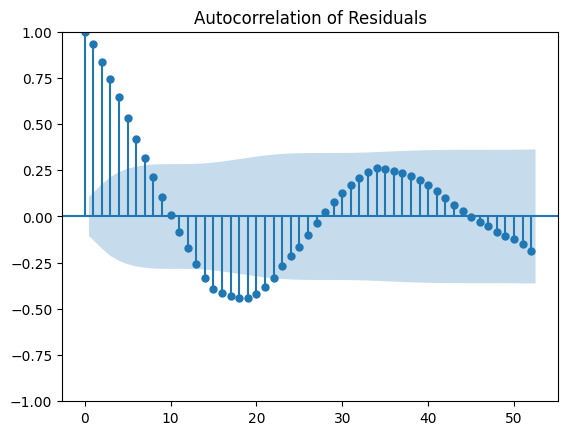

In [30]:
# Decompose the time series (additive or multiplicative)
result = seasonal_decompose(btc_weekly, model='additive', period=52)  # Weekly data with ~1 year seasonality

print(f'Annual seasonality:')

# Plot the decomposition
plt.figure(figsize=(10, 8))
result.plot()
plt.show()

print(f'Annual Residuals:')

plt.figure(figsize=(10, 4))
plt.plot(result.resid, label='Residuals')
plt.title('Residuals')
plt.legend()
plt.show()

from statsmodels.graphics.tsaplots import plot_acf

plot_acf(result.resid.dropna(), lags=52)  # Analyze up to 2 years of weekly lags
plt.title("Autocorrelation of Residuals")
plt.show()


***OTHER USEFULL VISUALIZATIONS***

Price       Adj Close          Close           High            Low  \
Ticker        BTC-USD        BTC-USD        BTC-USD        BTC-USD   
count     2801.000000    2801.000000    2801.000000    2801.000000   
mean     26081.437072   26081.437072   26637.861594   25437.628699   
std      22098.597552   22098.597552   22549.418000   21576.414885   
min       1421.599976    1421.599976    1434.319946    1348.300049   
25%       8041.779785    8041.779785    8216.812500    7830.758789   
50%      19201.091797   19201.091797   19464.671875   18813.455078   
75%      41143.929688   41143.929688   42195.632812   39825.691406   
max     106140.601562  106140.601562  108268.445312  105291.734375   

Price            Open        Volume  
Ticker        BTC-USD       BTC-USD  
count     2801.000000  2.801000e+03  
mean     26050.637173  2.489598e+10  
std      22070.240308  1.995839e+10  
min       1348.300049  4.371960e+08  
25%       8037.080078  1.053740e+10  
50%      19191.529297  2.179686e+

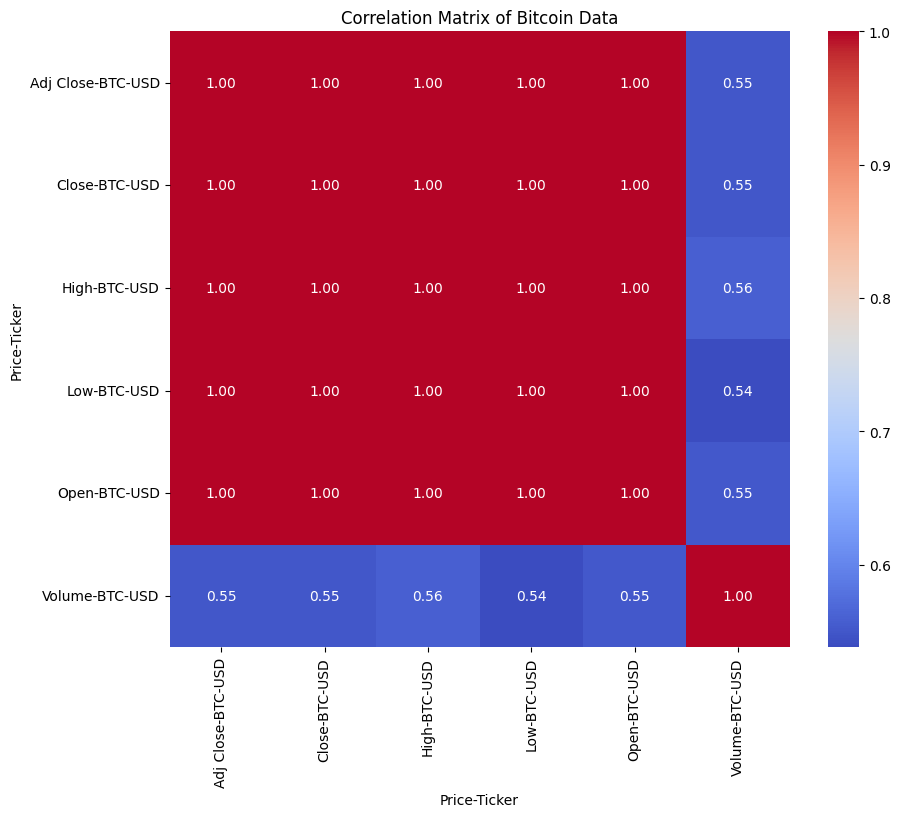

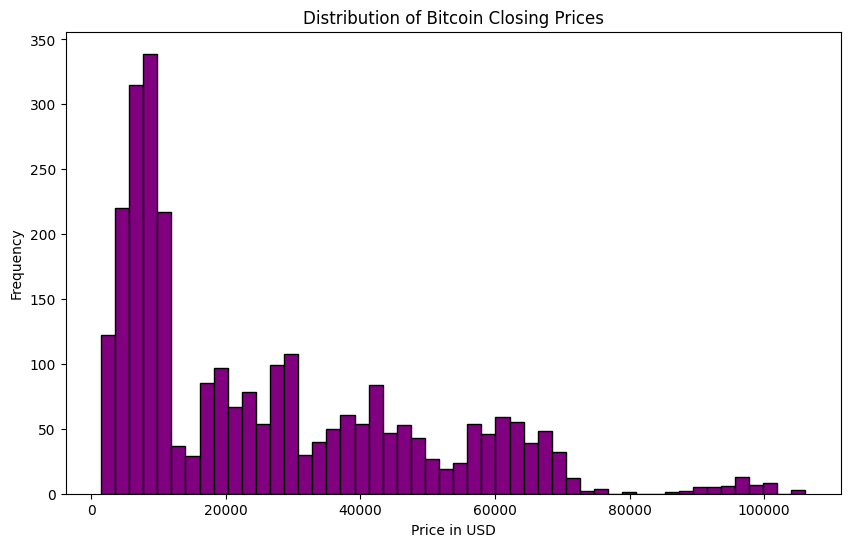

In [31]:
# Data Exploration: Summary statistics
print(btc_data.describe())

# Visualize the correlation matrix
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(btc_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix of Bitcoin Data')
plt.show()

# Plot a histogram of the closing prices
plt.figure(figsize=(10, 6))
plt.hist(btc_data['Close'], bins=50, color='purple', edgecolor='black')
plt.title('Distribution of Bitcoin Closing Prices')
plt.xlabel('Price in USD')
plt.ylabel('Frequency')
plt.show()


# ***4. Data Preprocessing***

In [32]:
# Check for missing values
print(btc_data.isnull().sum())
print(btc_data_train.isnull().sum())
print(btc_data_test.isnull().sum())

# Fill missing values with forward fill (you can also try interpolation or removal)
btc_data = btc_data.fillna(method='ffill')

# Feature Engineering: Adding technical indicators
# Convert btc_data['Close'] to a pandas Series
btc_data['SMA_30'] = ta.trend.sma_indicator(btc_data['Close'].squeeze(), window=30)  # Simple Moving Average
btc_data['SMA_100'] = ta.trend.sma_indicator(btc_data['Close'].squeeze(), window=100)
btc_data['RSI'] = ta.momentum.rsi(btc_data['Close'].squeeze(), window=14)  # Relative Strength Index
btc_data['MACD'] = ta.trend.macd(btc_data['Close'].squeeze())  # MACD
btc_data['MACD_signal'] = ta.trend.macd_signal(btc_data['Close'].squeeze())  # MACD Signal Line

# Drop rows with missing values that may result from technical indicators
btc_data.dropna(inplace=True)

# Feature selection: We'll use the features for prediction
features = ['Close', 'SMA_30', 'SMA_100', 'RSI', 'MACD', 'MACD_signal'] # This line remains unchanged

Price      Ticker 
Adj Close  BTC-USD    0
Close      BTC-USD    0
High       BTC-USD    0
Low        BTC-USD    0
Open       BTC-USD    0
Volume     BTC-USD    0
dtype: int64
Price      Ticker 
Adj Close  BTC-USD    0
Close      BTC-USD    0
High       BTC-USD    0
Low        BTC-USD    0
Open       BTC-USD    0
Volume     BTC-USD    0
dtype: int64
Price      Ticker 
Adj Close  BTC-USD    0
Close      BTC-USD    0
High       BTC-USD    0
Low        BTC-USD    0
Open       BTC-USD    0
Volume     BTC-USD    0
dtype: int64


<ipython-input-32-812e84802c7d>:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  btc_data = btc_data.fillna(method='ffill')


# ***5. Model Selection - 6.Model Training***

***I WILL BE USING THESE MODELS ***

Traditional Machine Learning Models:

*   Linear Regression - with OLS-MSE.
*   Logarithmic Fit
*   Exponential Fit
*   kNN - with Euclidean Distance.
*   Random Forest
*   SMA - Nothing
*   Support Vector Regression (SVR) - with ϵ-loss.


Time-Series Specific Models:
*   Arima - with Sum of Squared Residuals (SSR)

Deep Learning Models:
*   LSTM (Long Short-Term Memory) - Mean Squared Error (MSE).


As of the way they are trained:
80% dataset to Train and 20% for Testing.








***Linear Regression:***

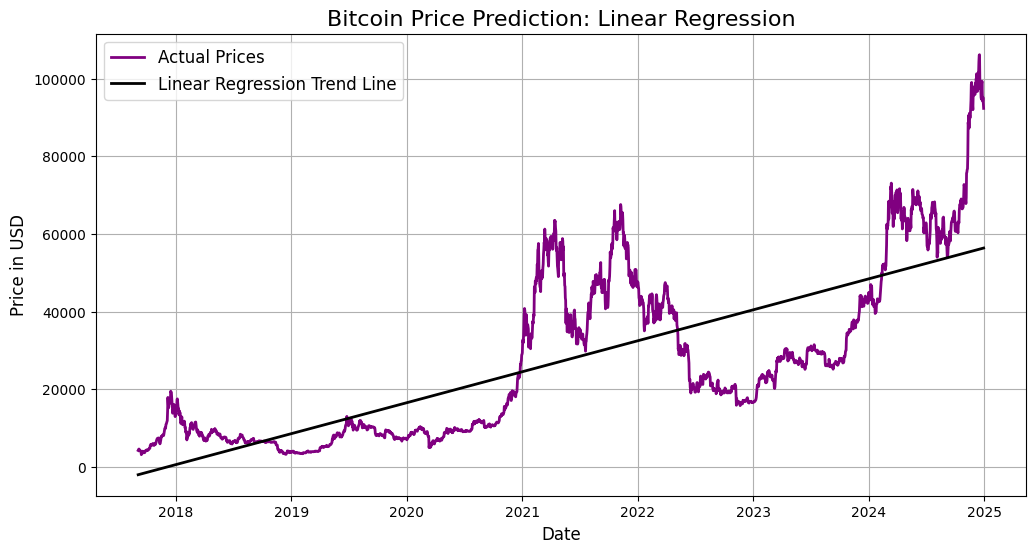

Metrics:
Mean Absolute Error: 5.957798893067324e-10
Mean Squared Error: 6.242459555529306e-19
Root Mean Squared Error: 7.900923715319181e-10


In [33]:
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np


# Prepare the data for modeling
X = btc_data[features]  # Features
y = btc_data['Close']  # Target variable (Price)

### DATA SCALING ###
# Standardize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scale all data

# Split the data into training and testing sets (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.99, shuffle=False)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5

# Calculate linear trend line for predictions (just for visualization)
trend = np.polyfit(range(len(y_test)), y_pred, 1)  # Fit a line over time
trend_line = np.polyval(trend, range(len(y_test)))

# Plot Actual and Trend Line
plt.figure(figsize=(12, 6))

# y_test might be a pandas Series, so access values directly using .values
plt.plot(y_test.index, y_test.values, label='Actual Prices', color='purple', linewidth=2)
plt.plot(y_test.index, trend_line, label='Linear Regression Trend Line', color='black', linewidth=2)

# Add labels, title, legend, and grid
plt.title('Bitcoin Price Prediction: Linear Regression', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)

# Show the plot
plt.show()

# Print Metrics
print(f'Metrics:')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')


***LOG - CHECK LATER***


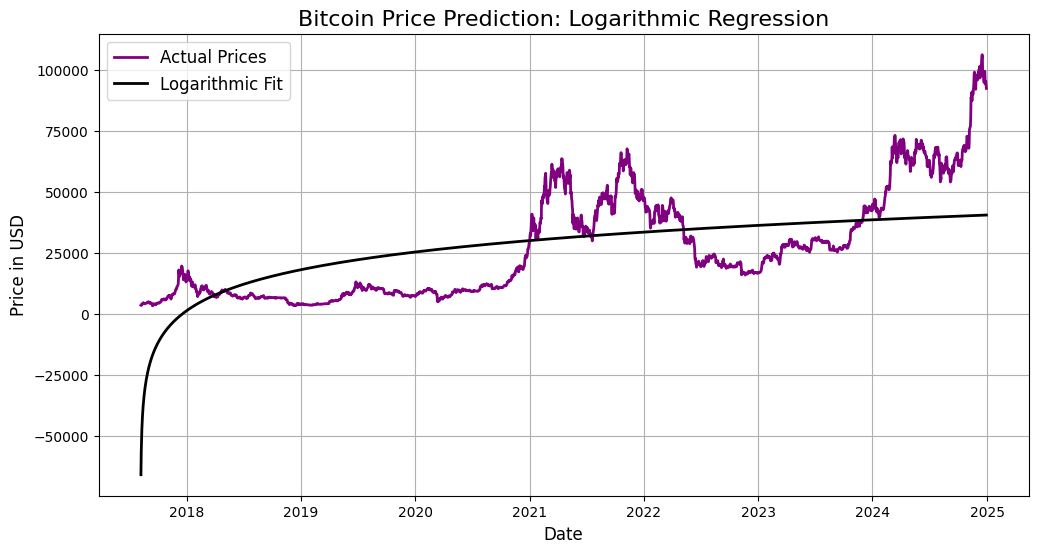

Metrics:
Mean Absolute Error: 14678.225127694692
Mean Squared Error: 305712651.2515549
Root Mean Squared Error: 17484.64043815471


In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define the logarithmic function
def log_function(x, a, b):
    return a + b * np.log(x)

# Prepare the data
X = btc_data.index.values.astype(float)  # Use the date index as X, convert to float
y = btc_data['Close'].values  # Target variable (Price)

# Represent dates as numerical values for logarithmic fitting
X_numeric = np.arange(len(X)) + 1  # Start from 1 to avoid log(0)

# Avoid invalid log values by ensuring X > 0 and scaling down X_numeric
X_numeric = np.where(X_numeric <= 0, 1e-9, X_numeric)  # Replace zeros or negatives with a small positive value
X_numeric = X_numeric / X_numeric.max()  # Scale X_numeric to a range between 0 and 1

# Reshape y to be 1-dimensional
y = y.ravel() #This reshapes y into a 1-dimensional array

# Fit the logarithmic function to the data
params, _ = curve_fit(log_function, X_numeric, y)  # Use X_numeric for fitting

# Get the parameters of the logarithmic model
a, b = params

# Predict using the logarithmic model
y_pred = log_function(X_numeric, a, b)  # Use X_numeric for prediction

# Evaluate the model
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = mse**0.5

# Plot Actual Prices and Logarithmic Trend Line
plt.figure(figsize=(12, 6))

plt.plot(btc_data.index, y, label='Actual Prices', color='purple', linewidth=2)
plt.plot(btc_data.index, y_pred, label='Logarithmic Fit', color='black', linewidth=2)

plt.title('Bitcoin Price Prediction: Logarithmic Regression', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)

plt.show()

# Print Metrics
print(f'Metrics:')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Log

[1.00037016 1.00074047 1.00111091 ... 2.71627052 2.71727599 2.71828183]


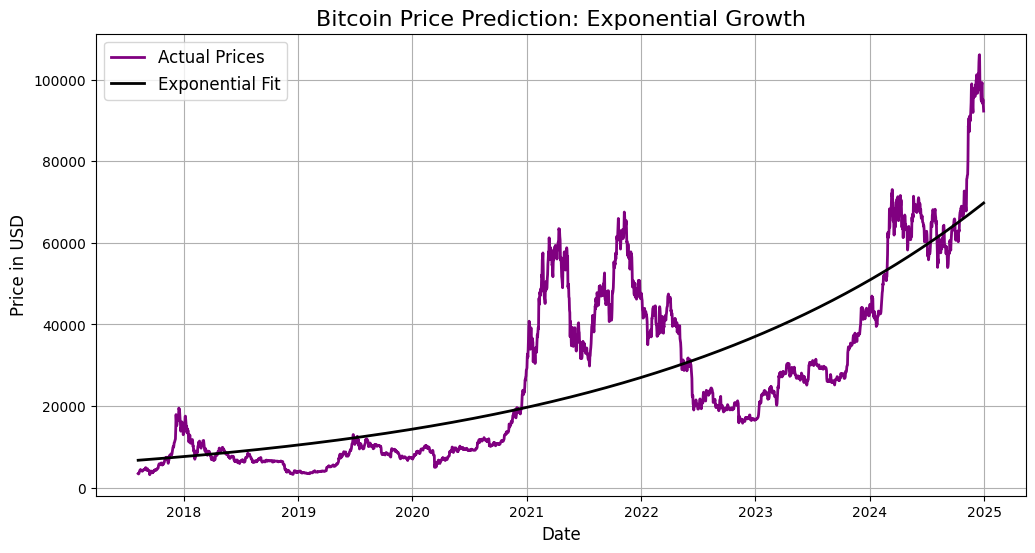

Metrics:
Mean Absolute Error: 10277.04339310274
Mean Squared Error: 180877937.93689543
Root Mean Squared Error: 13449.086881156483


In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define the exponential function
def exponential_function(x, a, b):
    return a * np.exp(b * x)

# Prepare the data
X = btc_data.index.values.astype(float)  # Use the date index as X, convert to float
y = btc_data['Close'].values  # Target variable (Price)

# Represent dates as numerical values for exponential fitting
X_numeric = np.arange(len(X)) + 1  # Start from 1 to avoid issues with exp(0)

# Scale X_numeric to a range between 0 and 1 for numerical stability
X_numeric = X_numeric / X_numeric.max()

# Ensure inputs are 1-dimensional arrays
X_numeric = X_numeric.ravel()
y = y.ravel()

# Remove problematic values
X_numeric = np.nan_to_num(X_numeric, nan=1e-9, posinf=1e9, neginf=0.0)
y = np.nan_to_num(y, nan=1e-9, posinf=1e9, neginf=0.0)

# Test the function output
try:
    print(exponential_function(X_numeric, 1, 1))  # Test with dummy parameters
except Exception as e:
    print(f"Error in function output: {e}")

# Fit the exponential function to the data
params, _ = curve_fit(exponential_function, X_numeric, y, maxfev=10000)

# Get the parameters of the exponential model
a, b = params

# Predict using the exponential model
y_pred = exponential_function(X_numeric, a, b)

# Evaluate the model
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = mse**0.5

# Plot Actual Prices and Exponential Trend Line
plt.figure(figsize=(12, 6))

plt.plot(btc_data.index, y, label='Actual Prices', color='purple', linewidth=2)
plt.plot(btc_data.index, y_pred, label='Exponential Fit', color='black', linewidth=2)

plt.title('Bitcoin Price Prediction: Exponential Growth', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)

plt.show()

# Print Metrics
print(f'Metrics:')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')


***kNN***

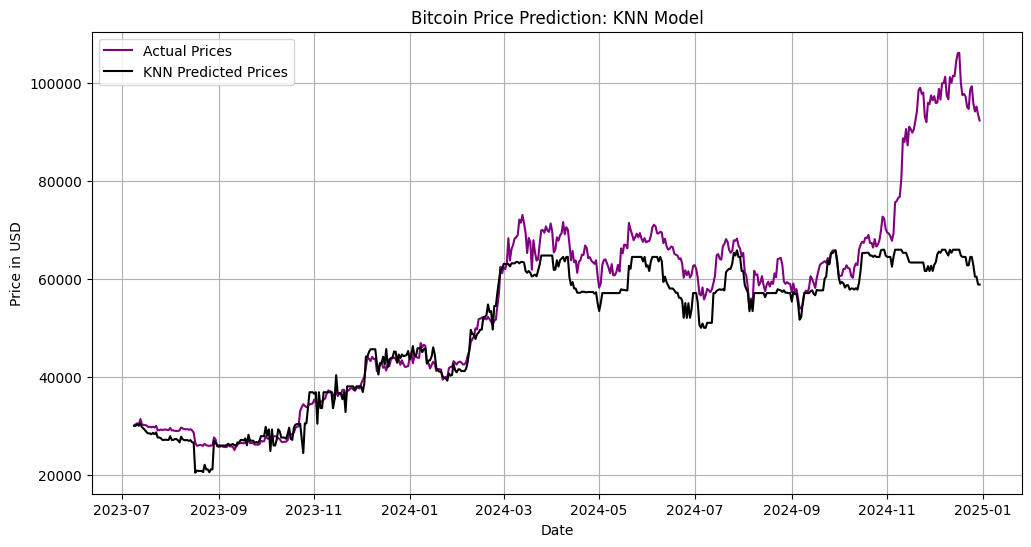

Model Evaluation Metrics:
Mean Absolute Error (MAE): 5882.42
Mean Squared Error (MSE): 114334409.84
R-squared (R2): 0.72


In [36]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Prepare the data for modeling
X = btc_data[features]  # Features
y = btc_data['Close']  # Target variable (Price)
### DATA SCALING ###
# Scale features using MinMaxScaler
scaler = MinMaxScaler()
# X_scaled = scaler.fit_transform(X)  # The error was here
X_scaled = scaler.fit_transform(btc_data[features])  # Scale the features in btc_data

### TRAIN-TEST SPLIT ###
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

### KNN MODEL ###
# Initialize the KNN Regressor with k=5 (you can tune this parameter)
knn = KNeighborsRegressor(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

### PLOT ACTUAL VS PREDICTED ###
plt.figure(figsize=(12, 6))
plt.plot(btc_data.index[-len(y_test):], y_test, label="Actual Prices", color='purple')
plt.plot(btc_data.index[-len(y_test):], y_pred, label="KNN Predicted Prices", color='black')

plt.title('Bitcoin Price Prediction: KNN Model')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.legend()
plt.grid(True)
plt.show()

### MODEL EVALUATION ###
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

***Random Forest***

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


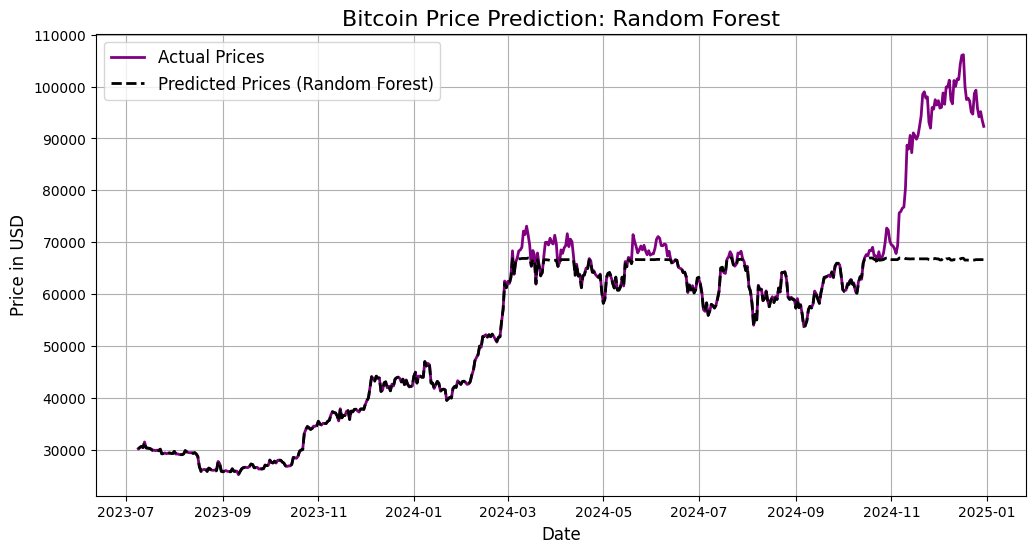

Metrics:
Random Forest - Mean Absolute Error (MAE): 3255.9650892444547
Random Forest - Mean Squared Error (MSE): 85193684.57945386
Random Forest - Root Mean Squared Error (RMSE): 9230.042501497697


In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Prepare the data for modeling
X = btc_data[features]  # Features
y = btc_data['Close']  # Target variable (Price)

# Split the data into training and testing sets
# Set test_size to 0.2 for 80% training and 20% testing, and ensure the data is not shuffled
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Random Forest model
random_forest = RandomForestRegressor(n_estimators=50, random_state=42, max_depth=20)

# Train the model
random_forest.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_rf = random_forest.predict(X_test_scaled)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf**0.5


# Plot Actual vs Predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Prices', color='purple', linewidth=2)
plt.plot(y_test.index, y_pred_rf, label='Predicted Prices (Random Forest)', color='black', linestyle='dashed', linewidth=2)

# Add labels, title, legend, and grid
plt.title('Bitcoin Price Prediction: Random Forest', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)

# Show the plot
plt.show()

# Print metrics
print(f'Metrics:')
print(f"Random Forest - Mean Absolute Error (MAE): {mae_rf}")
print(f"Random Forest - Mean Squared Error (MSE): {mse_rf}")
print(f"Random Forest - Root Mean Squared Error (RMSE): {rmse_rf}")

***SMA***

<ipython-input-38-a4ea154d886d>:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  y_pred_sma = test_data['SMA'].fillna(method='bfill')  # Forward fill NaN values


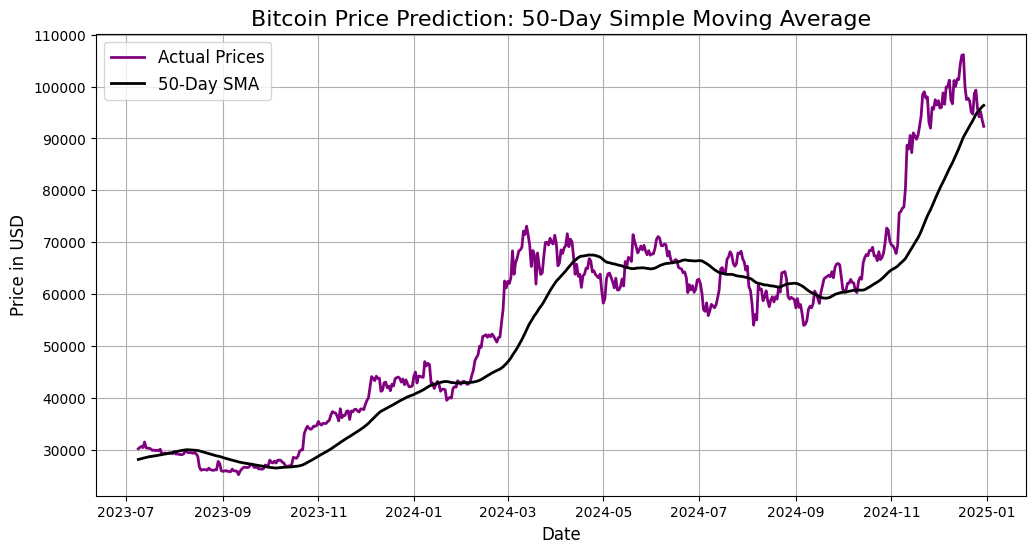

Mean Absolute Error (SMA): 4991.087605490411
Mean Squared Error (SMA): 50191077.00985262
Root Mean Squared Error (SMA): 7084.56611302715


In [38]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate the Simple Moving Average (SMA)
sma_window = 50  # You can change this value to 20, 100, etc.
btc_data['SMA'] = btc_data['Close'].rolling(window=sma_window).mean()

# Prepare the data for training and testing
train_size = int(0.8 * len(btc_data))  # 80% for training and 20% for testing
train_data = btc_data[:train_size]
test_data = btc_data[train_size:]

# Forecast using the Simple Moving Average (SMA) model
# For simplicity, we predict using the last available SMA value
y_pred_sma = test_data['SMA'].fillna(method='bfill')  # Forward fill NaN values

# True values for comparison
y_test_sma = test_data['Close']

# Remove NaN values from both y_test_sma and y_pred_sma before calculating the error
y_test_sma = y_test_sma.dropna()
y_pred_sma = y_pred_sma.dropna()

# Make sure both arrays have the same length and corresponding indices
y_pred_sma = y_pred_sma[y_pred_sma.index.isin(y_test_sma.index)]
y_test_sma = y_test_sma[y_test_sma.index.isin(y_pred_sma.index)]

# Evaluate the SMA model
mae_sma = mean_absolute_error(y_test_sma, y_pred_sma)
mse_sma = mean_squared_error(y_test_sma, y_pred_sma)
rmse_sma = np.sqrt(mse_sma)

# Plotting the results
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot the actual close prices
plt.plot(test_data['Close'], label='Actual Prices', color='purple', linewidth=2)

# Plot the predicted SMA prices
plt.plot(y_pred_sma, label=f'{sma_window}-Day SMA', color='black', linewidth=2)  # Use y_pred_sma for plotting

# Add labels, title, legend, and grid
plt.title(f'Bitcoin Price Prediction: {sma_window}-Day Simple Moving Average', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)

# Show the plot
plt.show()

# Output the evaluation metrics for the SMA model
print(f'Mean Absolute Error (SMA): {mae_sma}')
print(f'Mean Squared Error (SMA): {mse_sma}')
print(f'Root Mean Squared Error (SMA): {rmse_sma}')

***SVM***

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


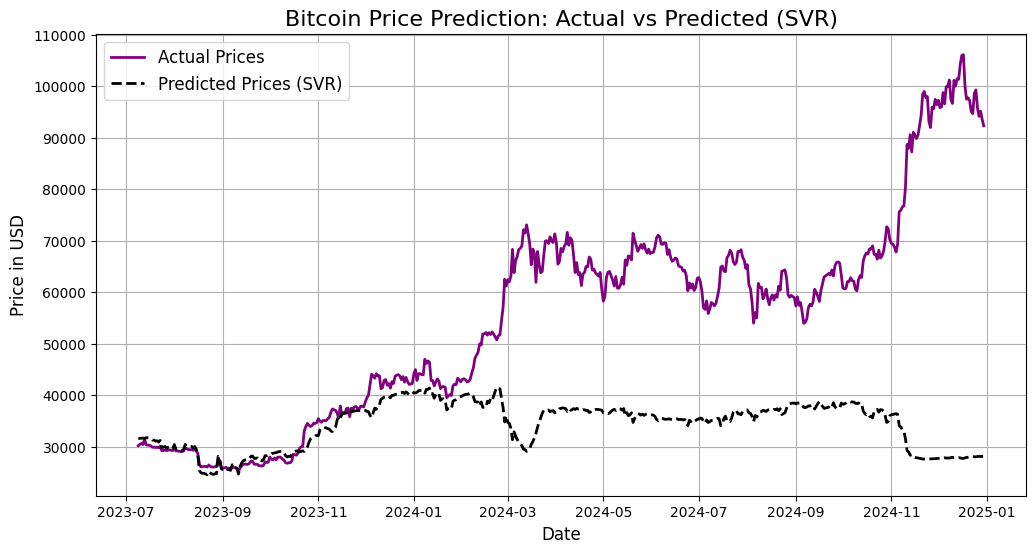

Metrics:
SVR - Mean Absolute Error (MAE): 20951.001242864582
SVR - Mean Squared Error (MSE): 839509356.4484696
SVR - Root Mean Squared Error (RMSE): 28974.28785058348


In [39]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np # Import numpy for sqrt function
import matplotlib.pyplot as plt # Import matplotlib for plotting


# Prepare the data for modeling (using the same features as before)
X = btc_data[features]  # Features (e.g., technical indicators)
y = btc_data['Close']  # Target variable (Bitcoin closing price)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Standardize the data (important for SVM models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Support Vector Machine model with an RBF kernel
svr_model = SVR(kernel='rbf', C=100, gamma='scale', epsilon=0.1)

# Train the model
svr_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_svr = svr_model.predict(X_test_scaled)

# Evaluate the model
mae_svr = mean_absolute_error(y_test, y_pred_svr) # Corrected: Using y_pred_svr
mse_svr = mean_squared_error(y_test, y_pred_svr)  # Corrected: Using y_pred_svr
rmse_svr = np.sqrt(mse_svr)                       # Corrected: Using mse_svr


# Plot Actual vs Predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Prices', color='purple', linewidth=2)
plt.plot(y_test.index, y_pred_svr, label='Predicted Prices (SVR)', color='black', linestyle='dashed', linewidth=2) # Corrected: Using y_pred_svr

# Add labels, title, legend, and grid
plt.title('Bitcoin Price Prediction: Actual vs Predicted (SVR)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)

# Show the plot
plt.show()

# Print metrics
print(f'Metrics:')
print(f"SVR - Mean Absolute Error (MAE): {mae_svr}")
print(f"SVR - Mean Squared Error (MSE): {mse_svr}")
print(f"SVR - Root Mean Squared Error (RMSE): {rmse_svr}")

***LSTM***

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


67/67 ━━━━━━━━━━━━━━━━━━━━ 17s 86ms/step - loss: 0.0587
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


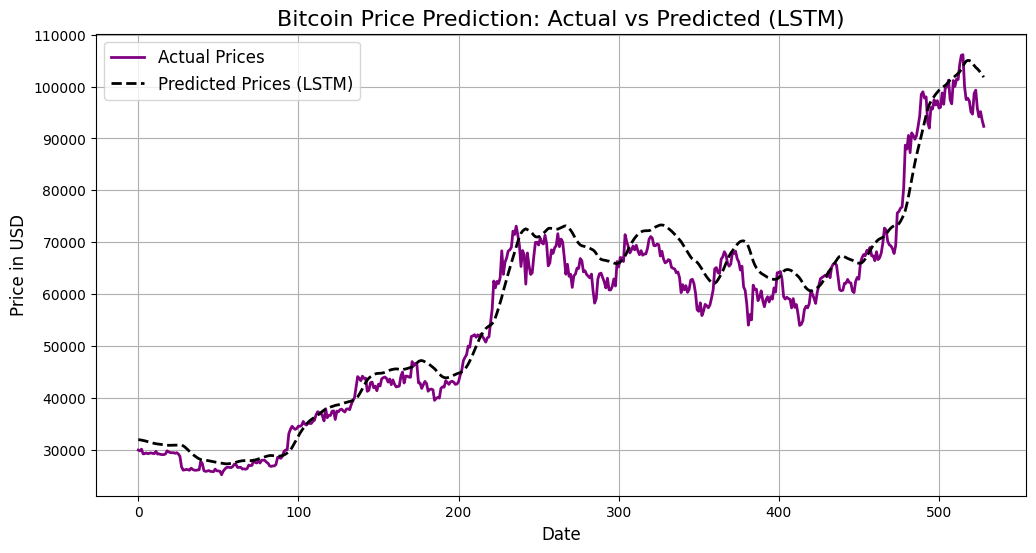

Metrics:
LSTM - Mean Absolute Error (MAE): 3264.2288368383743
LSTM - Mean Squared Error (MSE): 17417908.8287645
LSTM - Root Mean Squared Error (RMSE): 4173.476827390383


In [40]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Prepare the data for modeling
X = btc_data[features]  # Features (e.g., technical indicators)
y = btc_data['Close']  # Target variable (Bitcoin closing price)

# Scale the data to a range of 0-1 using MinMaxScaler (important for LSTM)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(btc_data[['Close']])  # Scale the target variable

# Prepare the data for supervised learning (using a time window for the LSTM)
def create_dataset(data, time_step=60):
    X_data, y_data = [], []
    for i in range(time_step, len(data)):
        X_data.append(data[i-time_step:i, 0])  # Take 'time_step' previous data points
        y_data.append(data[i, 0])  # Target is the 'Close' price
    return np.array(X_data), np.array(y_data)

# Create the dataset
time_step = 60
X_data, y_data = create_dataset(scaled_data, time_step)

# Reshape X_data for LSTM input (samples, time_steps, features)
X_data = X_data.reshape(X_data.shape[0], X_data.shape[1], 1)

# Split the data into training and testing sets
train_size = int(len(X_data) * 0.8)
X_train, X_test = X_data[:train_size], X_data[train_size:]
y_train, y_test = y_data[:train_size], y_data[train_size:]

# Initialize the LSTM model
lstm_model = Sequential()

# Add LSTM layers
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
lstm_model.add(Dropout(0.2))  # Dropout for regularization
lstm_model.add(LSTM(units=50, return_sequences=False))
lstm_model.add(Dropout(0.2))

# Add output layer
lstm_model.add(Dense(units=1))

# Compile the model
lstm_model.compile(optimizer='adam', loss='mean_absolute_error')

# Train the model
lstm_model.fit(X_train, y_train, epochs=1, batch_size=32, verbose=1)

# Predict on the test set
y_pred_lstm = lstm_model.predict(X_test)

# Inverse transform the predictions and actual values to get the original scale of the prices
y_pred_lstm = scaler.inverse_transform(y_pred_lstm)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluate the model
mae_lstm = mean_absolute_error(y_test_actual, y_pred_lstm)
mse_lstm = mean_squared_error(y_test_actual, y_pred_lstm)
rmse_lstm = np.sqrt(mse_lstm)


# Plot Actual vs Predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual Prices', color='purple', linewidth=2)
plt.plot(y_pred_lstm, label='Predicted Prices (LSTM)', color='black', linestyle='dashed', linewidth=2)

# Add labels, title, legend, and grid
plt.title('Bitcoin Price Prediction: Actual vs Predicted (LSTM)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)

# Show the plot
plt.show()

# Print metrics
print(f'Metrics:')
print(f"LSTM - Mean Absolute Error (MAE): {mae_lstm}")
print(f"LSTM - Mean Squared Error (MSE): {mse_lstm}")
print(f"LSTM - Root Mean Squared Error (RMSE): {rmse_lstm}")


***Arima***

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


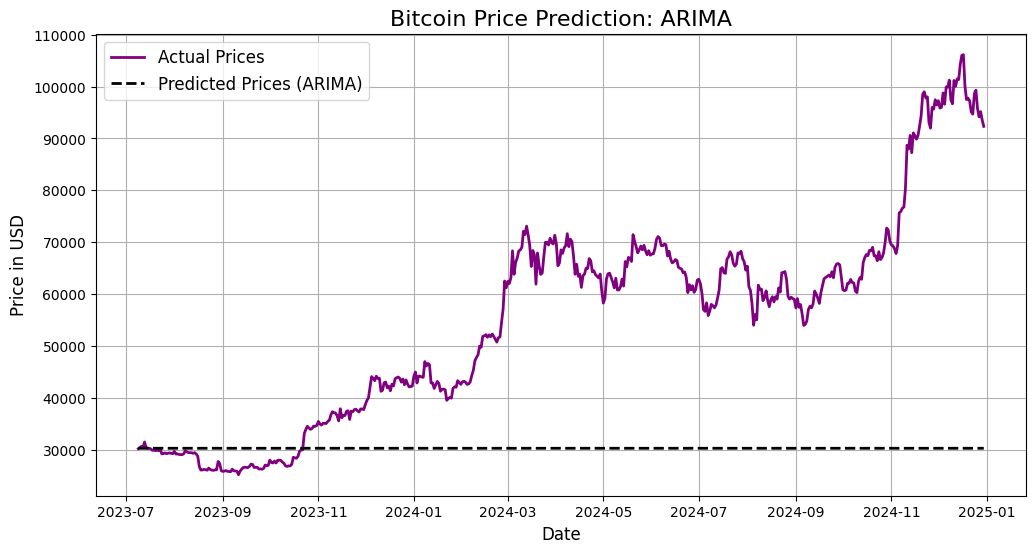

Metrics:
ARIMA Model - Mean Absolute Error (MAE): 25628.951715293406
ARIMA Model - Mean Squared Error (MSE): 1013161505.268052
ARIMA Model - Root Mean Squared Error (RMSE): 31830.198008621497


In [41]:
# Ensure data is in the right format (use only 'Close' column for time series analysis)
btc_prices = btc_data['Close']

# Split the data into training and testing sets (80% training, 20% testing)
train_size = int(0.8 * len(btc_prices))
train_data, test_data = btc_prices[:train_size], btc_prices[train_size:]

# Train the ARIMA model (p=5, d=1, q=0 as an example)
from statsmodels.tsa.arima.model import ARIMA # Import ARIMA if not already imported
model_arima = ARIMA(train_data, order=(5, 1, 0))
fitted_arima = model_arima.fit()

# Forecast on the test set
forecast_arima = fitted_arima.forecast(steps=len(test_data))

# Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error # Import if not already imported
import numpy as np # Import numpy if not already imported
mae_arima = mean_absolute_error(test_data, forecast_arima)
mse_arima = mean_squared_error(test_data, forecast_arima)
rmse_arima = np.sqrt(mse_arima)

# Create a date range for forecasted values
forecast_index = btc_prices.index[train_size:]

# Check if forecast_arima has valid values
import matplotlib.pyplot as plt # Import matplotlib if not already imported
if len(forecast_arima) == len(forecast_index):
    plt.figure(figsize=(12, 6))
    # Replace y_test_arima with test_data
    plt.plot(test_data.index, test_data, label='Actual Prices', color='purple', linewidth=2)
    plt.plot(forecast_index, forecast_arima, label='Predicted Prices (ARIMA)', color='black', linestyle='dashed', linewidth=2)

    # Add labels, title, legend, and grid
    plt.title('Bitcoin Price Prediction: ARIMA', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Price in USD', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True)

    # Show the plot
    plt.show()
else:
    print("Forecast length does not match test set length.")

# Print metrics
print(f'Metrics:')
print(f"ARIMA Model - Mean Absolute Error (MAE): {mae_arima}")
print(f"ARIMA Model - Mean Squared Error (MSE): {mse_arima}")
print(f"ARIMA Model - Root Mean Squared Error (RMSE): {rmse_arima}")

# ***7. Model Optimization***

***HYPERPARAMETER TUNING:***



I Will be Using these Hyper-Parameter Tuning Techniques:


*    GridSearchCV
*    RandomizedSearchCV
*    Hyperband




Linear Regression

Cross-Validation Results:
Mean MAE: 0.0000
Standard Deviation of MAE: 0.0000
Cross-Validation Results:
Mean MAE: 0.0000
Standard Deviation of MAE: 0.0000


<Figure size 1200x600 with 0 Axes>

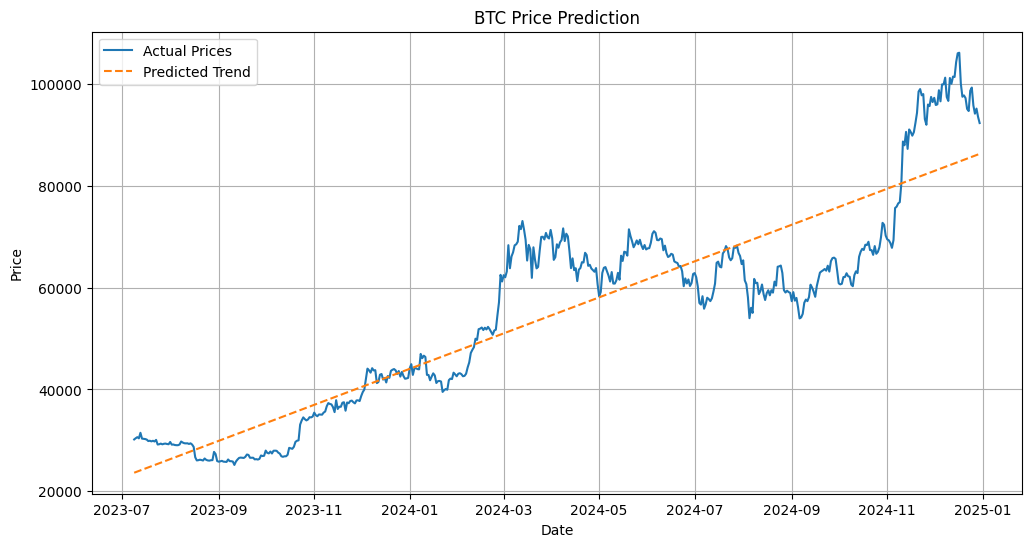

In [42]:
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, make_scorer
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Example Data Preparation (Ensure btc_data is loaded)
# btc_data = yf.download('BTC-USD')  # Uncomment and replace this with your data-loading step
# features = [...]  # Define your feature columns

# Prepare the data for modeling
X = btc_data[features]  # Features
y = btc_data['Close']  # Target variable (Price)

### DATA SCALING ###
# Standardize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scale all data

# Define the model
model = LinearRegression()

### CROSS-VALIDATION ###
# Use cross_val_score for MAE as the scoring metric
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)  # Negative because lower MAE is better
scores = cross_val_score(model, X_scaled, y, cv=5, scoring=mae_scorer)

# Convert scores to positive values for better interpretation
scores = -scores

print("Cross-Validation Results:")
print(f"Mean MAE: {np.mean(scores):.4f}")
print(f"Standard Deviation of MAE: {np.std(scores):.4f}")

# Optional: Train/Test Split for Visualization
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

# Train the model on the training data
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5

# Calculate linear trend line for predictions (just for visualization)
trend = np.polyfit(range(len(y_test)), y_pred, 1)  # Fit a line over time
trend_line = np.polyval(trend, range(len(y_test)))

# Plot Actual and Trend Line
plt.figure(figsize=(12, 6))

import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, make_scorer
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Example Data Preparation (Ensure btc_data is loaded)
# btc_data = yf.download('BTC-USD')  # Uncomment and replace this with your data-loading step
# features = [...]  # Define your feature columns

# Prepare the data for modeling
X = btc_data[features]  # Features
y = btc_data['Close']  # Target variable (Price)

### DATA SCALING ###
# Standardize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scale all data

# Define the model
model = LinearRegression()

### CROSS-VALIDATION ###
# Use cross_val_score for MAE as the scoring metric
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)  # Negative because lower MAE is better
scores = cross_val_score(model, X_scaled, y, cv=5, scoring=mae_scorer)

# Convert scores to positive values for better interpretation
scores = -scores

print("Cross-Validation Results:")
print(f"Mean MAE: {np.mean(scores):.4f}")
print(f"Standard Deviation of MAE: {np.std(scores):.4f}")

# Optional: Train/Test Split for Visualization
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

# Train the model on the training data
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5

# Calculate linear trend line for predictions (just for visualization)
trend = np.polyfit(range(len(y_test)), y_pred, 1)  # Fit a line over time
trend_line = np.polyval(trend, range(len(y_test)))

# Plot Actual and Trend Line
plt.figure(figsize=(12, 6))

# y_test might be a pandas Series, so access values directly using .values
plt.plot(y_test.index, y_test.values, label='Actual Prices')
plt.plot(y_test.index, trend_line, label='Predicted Trend', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('BTC Price Prediction')
plt.legend()
plt.grid(True)
plt.show()


Log Fit

Exponential Fit

Knn

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor # Import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler   # Import StandardScaler
from sklearn.model_selection import train_test_split # Import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error # Import error metrics
from sklearn.preprocessing import MinMaxScaler    # Import MinMaxScaler
import matplotlib.pyplot as plt                   # Import matplotlib for plotting

# Prepare the data for modeling
X = btc_data[features]  # Features
y = btc_data['Close']  # Target variable (Price)

### DATA SCALING ###
# Scale features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)  # Scale only the features in X

### TRAIN-TEST SPLIT ###
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

### KNN MODEL ###
# Define the parameter grid
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_k = grid_search.best_params_['n_neighbors']
print(f"Best K value: {best_k}")

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END ......................................n_neighbors=7; total time=   0.0s
[CV] END ......................................n_

Random Forest

Fitting 5 folds for each of 162 candidates, totalling 810 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
270 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
121 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Random Forest - MAE: 5689.703607757625
Best Random Forest - MSE: 114834902.22952422
Best Random Forest - RMSE: 10716.104806762774


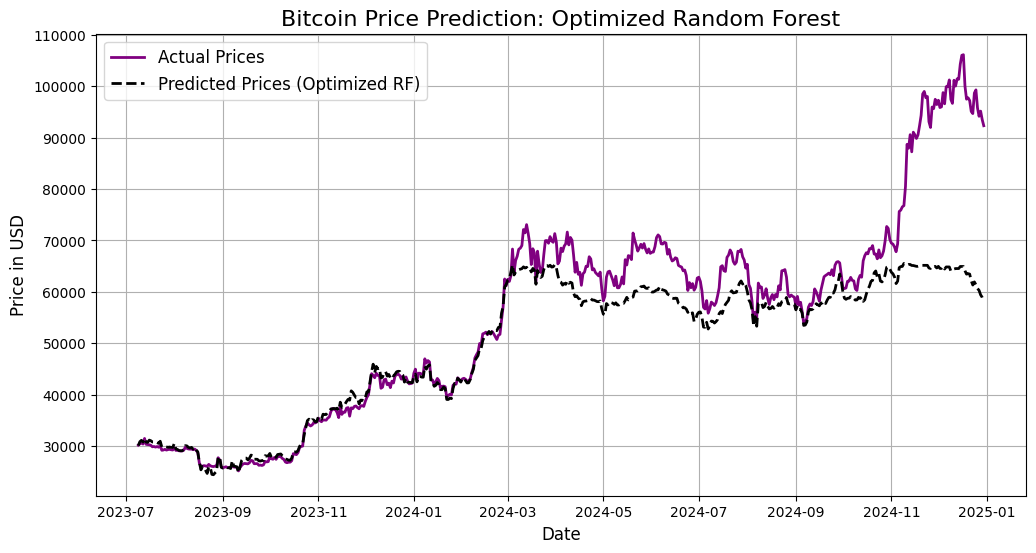

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Prepare the data for modeling
X = btc_data[features]  # Features
y = btc_data['Close']  # Target variable (Price)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 60],  # Number of trees
    'max_depth': [10, 20, None],     # Maximum depth of the tree
    'min_samples_split': [2, 5, 10], # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],   # Minimum samples required at each leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider for splits
}

# Initialize Random Forest Regressor
random_forest = RandomForestRegressor(random_state=42)

# Perform Grid Search with 5-fold Cross-Validation
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train_scaled, y_train)

# Extract the best model and parameters
best_random_forest = grid_search.best_estimator_
best_params = grid_search.best_params_

# Predict on the test set using the best model
y_pred_rf = best_random_forest.predict(X_test_scaled)

# Evaluate the best model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5

# Print best parameters and metrics
print(f"Best Hyperparameters: {best_params}")
print(f"Best Random Forest - MAE: {mae_rf}")
print(f"Best Random Forest - MSE: {mse_rf}")
print(f"Best Random Forest - RMSE: {rmse_rf}")

# Plot Actual vs Predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Prices', color='purple', linewidth=2)
plt.plot(y_test.index, y_pred_rf, label='Predicted Prices (Optimized RF)', color='black', linestyle='dashed', linewidth=2)

# Add labels, title, legend, and grid
plt.title('Bitcoin Price Prediction: Optimized Random Forest', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)

# Show the plot
plt.show()


SMA

SVR

Fitting 5 folds for each of 80 candidates, totalling 400 fits


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Best Hyperparameters: {'C': 1000, 'epsilon': 0.5, 'gamma': 0.1}


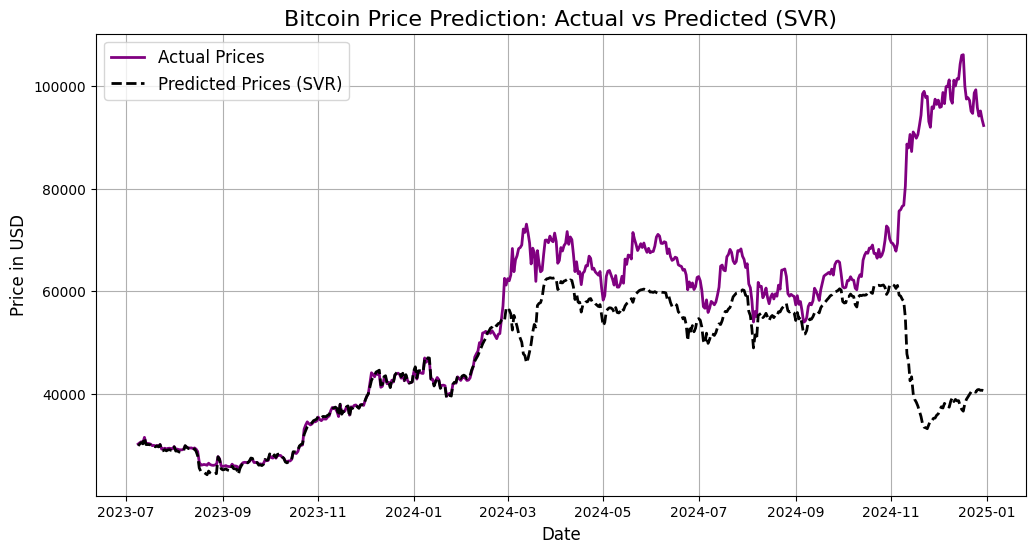

Metrics:
SVR - Mean Absolute Error (MAE): 9122.860712524982
SVR - Mean Squared Error (MSE): 350324893.32997024
SVR - Root Mean Squared Error (RMSE): 18716.9680592229


In [53]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np  # Import numpy for sqrt function
import matplotlib.pyplot as plt  # Import matplotlib for plotting

# Prepare the data for modeling (using the same features as before)
X = btc_data[features]  # Features (e.g., technical indicators)
y = btc_data['Close']  # Target variable (Bitcoin closing price)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Standardize the data (important for SVM models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the Support Vector Machine model (SVR)
svr_model = SVR(kernel='rbf')  # We will tune the C, gamma, and epsilon parameters

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],        # Regularization parameter
    'gamma': ['scale', 'auto', 0.1, 0.5],    # Gamma for the RBF kernel
    'epsilon': [0.01, 0.1, 0.2, 0.5],    # Epsilon (tube width)
}

# Set up GridSearchCV with cross-validation (using 5-fold cross-validation)
grid_search = GridSearchCV(svr_model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Perform grid search
grid_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters found by GridSearchCV
print("Best Hyperparameters:", grid_search.best_params_)

# Use the best model found by GridSearchCV
best_svr_model = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred_svr = best_svr_model.predict(X_test_scaled)

# Evaluate the model
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)

# Plot Actual vs Predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Prices', color='purple', linewidth=2)
plt.plot(y_test.index, y_pred_svr, label='Predicted Prices (SVR)', color='black', linestyle='dashed', linewidth=2)

# Add labels, title, legend, and grid
plt.title('Bitcoin Price Prediction: Actual vs Predicted (SVR)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)

# Show the plot
plt.show()

# Print metrics
print(f'Metrics:')
print(f"SVR - Mean Absolute Error (MAE): {mae_svr}")
print(f"SVR - Mean Squared Error (MSE): {mse_svr}")
print(f"SVR - Root Mean Squared Error (RMSE): {rmse_svr}")


Arima

***CROSS-VALIDATION:***



I Will be Using these Cross-Validation Techniques:


*   K-Fold Cross-Validation
*   Stratified K-Fold Cross-Validation
*   Leave one out Cross-Validation

I am also gonna be using the TA and the other MacroEconomic Indicators i have stated on the documentation to assist our Cross Validation Process to maximize our models's potential.




kNN

In [44]:
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Prepare the data for modeling
X = btc_data[features]  # Features
y = btc_data['Close']  # Target variable (Price)

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)  # Scale the features

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

# Define cross-validation strategy (5-fold cross-validation)
cv = KFold(n_splits=5, shuffle=False)

# Initialize the KNN Regressor
knn = KNeighborsRegressor()

# Define hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print(f"Best Hyperparameters: {best_params}")

# Get predictions on the test set using the best model
y_pred_test = best_model.predict(X_test)

# Calculate evaluation metrics on the test set
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

# Print the metrics
print(f"Evaluation Metrics (on the test set):")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Mean Squared Error (MSE): {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"R-squared (R2): {r2_test:.2f}")


Best Hyperparameters: {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}
Evaluation Metrics (on the test set):
Mean Absolute Error (MAE): 5877.71
Mean Squared Error (MSE): 112909501.99
Root Mean Squared Error (RMSE): 10625.89
R-squared (R2): 0.72


Random Forest

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

# Prepare the data for modeling
X = btc_data[features]  # Features
y = btc_data['Close']  # Target variable (Price)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the Random Forest model
random_forest = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)

# Define cross-validation strategy (e.g., K-Fold with no shuffle to respect temporal order)
cv = KFold(n_splits=5, shuffle=False)

# Custom scoring functions for MAE, MSE, RMSE
mae_scorer = make_scorer(mean_absolute_error)
mse_scorer = make_scorer(mean_squared_error)

# Perform cross-validation for each metric
mae_scores = cross_val_score(random_forest, X_scaled, y, cv=cv, scoring=mae_scorer)
mse_scores = cross_val_score(random_forest, X_scaled, y, cv=cv, scoring=mse_scorer)
rmse_scores = np.sqrt(-cross_val_score(random_forest, X_scaled, y, cv=cv, scoring='neg_mean_squared_error'))

# Print cross-validation metrics
print(f'Cross-Validation Metrics:')
print(f"Random Forest - Mean Absolute Error (MAE): {np.mean(mae_scores):.4f} ± {np.std(mae_scores):.4f}")
print(f"Random Forest - Mean Squared Error (MSE): {np.mean(mse_scores):.4f} ± {np.std(mse_scores):.4f}")
print(f"Random Forest - Root Mean Squared Error (RMSE): {np.mean(rmse_scores):.4f} ± {np.std(rmse_scores):.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

Cross-Validation Metrics:
Random Forest - Mean Absolute Error (MAE): 928.4110 ± 1211.8341
Random Forest - Mean Squared Error (MSE): 17780066.0723 ± 34245013.1802
Random Forest - Root Mean Squared Error (RMSE): 2350.5225 ± 3500.7299


svr


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Hyperparameters: {'C': 100, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Evaluation Metrics (on the test set):
Mean Absolute Error (MAE): 261.74
Mean Squared Error (MSE): 143160.78
Root Mean Squared Error (RMSE): 378.37
R-squared (R2): 1.00


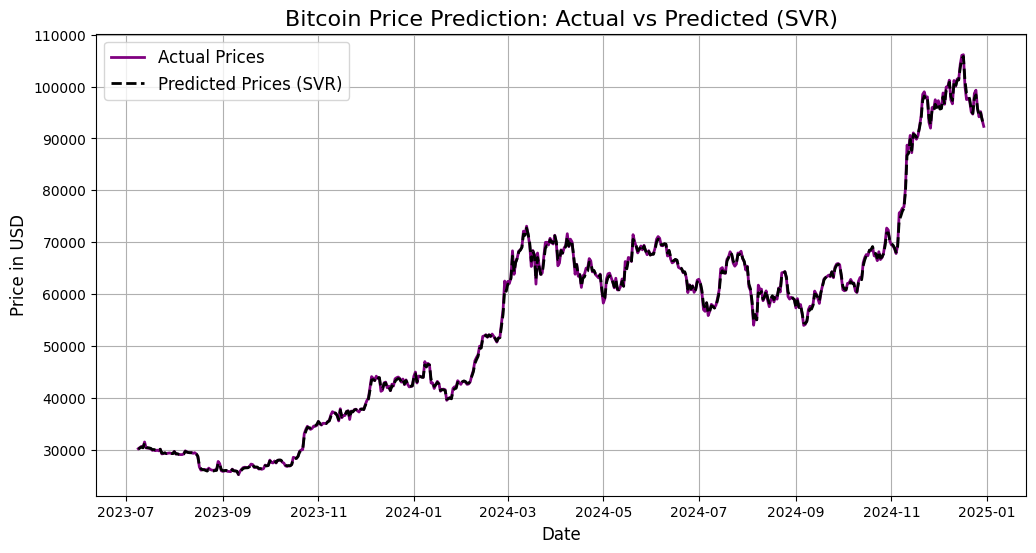

In [46]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Prepare the data for modeling
X = btc_data[features]  # Features (e.g., technical indicators)
y = btc_data['Close']  # Target variable (Bitcoin closing price)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Standardize the data (important for SVM models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define cross-validation strategy (5-fold cross-validation)
cv = KFold(n_splits=5, shuffle=False)

# Define the SVR model
svr = SVR()

# Define the hyperparameter grid
param_grid = {
    'kernel': ['rbf', 'linear', 'poly'],
    'C': [1, 10, 100],
    'gamma': ['scale', 'auto'],
    'epsilon': [0.1, 0.2, 0.5]
}

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print(f"Best Hyperparameters: {best_params}")

# Get predictions on the test set using the best model
y_pred_svr = best_model.predict(X_test_scaled)

# Calculate evaluation metrics on the test set
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr)

# Print the metrics
print(f"Evaluation Metrics (on the test set):")
print(f"Mean Absolute Error (MAE): {mae_svr:.2f}")
print(f"Mean Squared Error (MSE): {mse_svr:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_svr:.2f}")
print(f"R-squared (R2): {r2_svr:.2f}")

# Plot Actual vs Predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Prices', color='purple', linewidth=2)
plt.plot(y_test.index, y_pred_svr, label='Predicted Prices (SVR)', color='black', linestyle='dashed', linewidth=2)

# Add labels, title, legend, and grid
plt.title('Bitcoin Price Prediction: Actual vs Predicted (SVR)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)

# Show the plot
plt.show()

Random forest

In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

# Prepare the data for modeling
X = btc_data[features]  # Features
y = btc_data['Close']  # Target variable (Price)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define cross-validation strategy
cv = KFold(n_splits=5, shuffle=False)

# Initialize the Random Forest model
random_forest = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100],           # Fewer values
    'max_depth': [10, 20, None],        # Limit depth options
    'min_samples_split': [2, 5],        # Remove higher splits
    'min_samples_leaf': [1, 2]
}

# Define scoring metric (e.g., RMSE)
rmse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Perform Grid Search
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid,
                           scoring=rmse_scorer, cv=cv, verbose=1, n_jobs=-1)

# Fit the GridSearch to the data
grid_search.fit(X_scaled, y)

# Extract the best model and hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate the best model
best_rmse = np.sqrt(-grid_search.best_score_)

print(f"Best Hyperparameters: {best_params}")
print(f"Best RMSE from GridSearchCV: {best_rmse:.4f}")


Fitting 5 folds for each of 24 candidates, totalling 120 fits


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best RMSE from GridSearchCV: 4214.1577


In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import numpy as np

# Prepare the data
X = btc_data[features]
y = btc_data['Close']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the RandomForestRegressor
model = RandomForestRegressor(random_state=42)

# Define cross-validation strategy
cv = KFold(n_splits=5, shuffle=False)

# Define parameter grid
param_grid = {
    'n_estimators': [50, 60],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}

# Combine GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_scaled, y)

# Best parameters and score
print(f'Best Hyperparameters: {grid_search.best_params_}')
print(f'Best RMSE: {np.sqrt(-grid_search.best_score_):.4f}')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best Hyperparameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 50}
Best RMSE: 4224.5985


**My Weighted Formula Here:**



---


# ***8. Models Evaluations***

---



***METRICS SCORES:***


-Linear Regression \
MAE: \
MSE: \
RMSE: \

-kNN \
MAE: \
MSE: \
RMSE: \

-Random Forest  \
MAE: \
MSE: \
RMSE: \

-SMA \
MAE: \
MSE: \
RMSE: \

-SVR \
MAE: \
MSE: \
RMSE: \

-LSTM \
MAE: \
MSE: \
RMSE: \

-Arima \
MAE: \
MSE: \
RMSE: \


***F1 SCORE:***

Variance-BIAS

Other Techniques

# ***9. Testing***